In [8]:
import os
import numpy as np
import pandas as pd

dir_data="../home-credit-default-risk"
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
#the file encode problem on macOS
app_train = pd.read_csv(f_app)

#app_train.head()
print(app_train.dtypes)


Path of read in data: ../home-credit-default-risk/application_train.csv
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE 

In [9]:
dtype_select = ['int64','float']

#app_train.drop(df.select_dtypes(['int']), inplace=True, axis=1)
#print(df)
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
#filter col only has 
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])



SK_ID_CURR


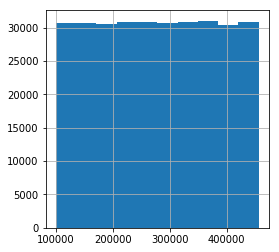

CNT_CHILDREN


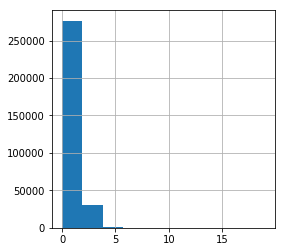

DAYS_BIRTH


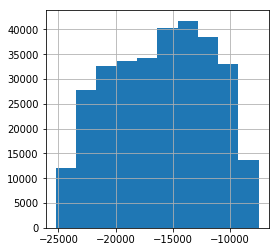

DAYS_EMPLOYED


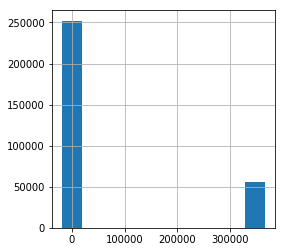

DAYS_ID_PUBLISH


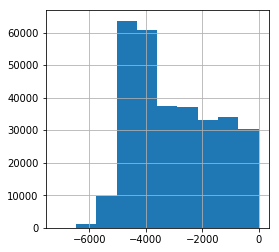

REGION_RATING_CLIENT


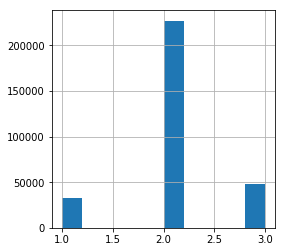

REGION_RATING_CLIENT_W_CITY


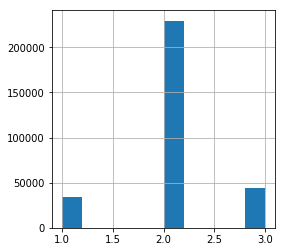

HOUR_APPR_PROCESS_START


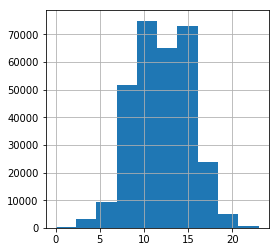

In [10]:
import matplotlib.pyplot as plt

#check_col=["AMT_ANNUITY","AMT_INCOME_TOTAL","REGION_POPULATION_RELATIVE","OBS_60_CNT_SOCIAL_CIRCLE"]

for col in numeric_columns:
    app_train[col].hist(figsize=(4,4))
    print(col)
    plt.show()

In [11]:
#REGION_POPULATION_RELATIVE
#OWN_CAR_AGE

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


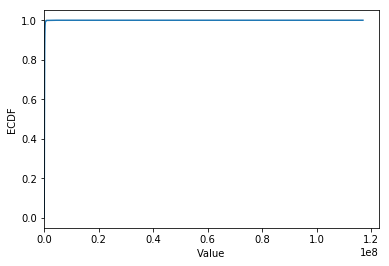

In [12]:

import statsmodels.api as sm  

#print(numeric_columns)
print(app_train['AMT_INCOME_TOTAL'].describe())
#counts, bin_edges = np.histogram (app_train['AMT_INCOME_TOTAL'], normed=True)
#cdf = np.cumsum (counts)

cdf = sm.distributions.ECDF(app_train['AMT_INCOME_TOTAL'])  

#cdf=ECDF(app_train['AMT_INCOME_TOTAL'])
plt.plot(cdf.x, cdf.y) 

plt.xlabel('Value') 

plt.ylabel('ECDF') 

plt.xlim([cdf.x[1], cdf.x[-1] * 1.05]) 
plt.ylim([-0.05,1.05])
plt.show()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


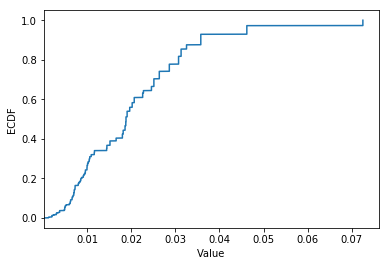

In [13]:
#REGION_POPULATION_RELATIVE

#print(numeric_columns)
print(app_train['REGION_POPULATION_RELATIVE'].describe())
#counts, bin_edges = np.histogram (app_train['AMT_INCOME_TOTAL'], normed=True)
#cdf = np.cumsum (counts)

cdf = sm.distributions.ECDF(app_train['REGION_POPULATION_RELATIVE'])  

#cdf=ECDF(app_train['AMT_INCOME_TOTAL'])
plt.plot(cdf.x, cdf.y) 

plt.xlabel('Value') 

plt.ylabel('ECDF') 

plt.xlim([cdf.x[1], cdf.x[-1] * 1.05]) 
plt.ylim([-0.05,1.05])
plt.show()

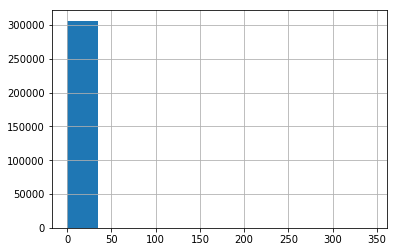

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


<bound method NDFrame.describe of 0          2.0
1          1.0
2          0.0
3          2.0
4          0.0
5          0.0
6          1.0
7          2.0
8          1.0
9          2.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
15         0.0
16         0.0
17         4.0
18         8.0
19         0.0
20         0.0
21         0.0
22         0.0
23         0.0
24         1.0
25         0.0
26        10.0
27         2.0
28         0.0
29         0.0
          ... 
307481     0.0
307482     0.0
307483     1.0
307484     0.0
307485     0.0
307486     0.0
307487     0.0
307488     1.0
307489     1.0
307490     0.0
307491     4.0
307492     0.0
307493     0.0
307494    11.0
307495     0.0
307496     0.0
307497     0.0
307498     0.0
307499     4.0
307500     0.0
307501     2.0
307502     0.0
307503     9.0
307504     0.0
307505     0.0
307506     0.0
307507     0.0
307508     6.0
307509     0.0
307510     0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, Length: 307511, dty

In [33]:
#OBS_60_CNT_SOCIAL_CIRCLE
#print(numeric_columns)
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))


count       29
unique       1
top       True
freq        29
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: object


/Users/vincent/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


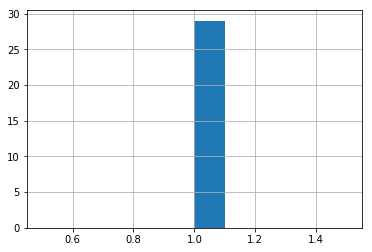

True    29
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64
count       29
unique       1
top       True
freq        29
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: object


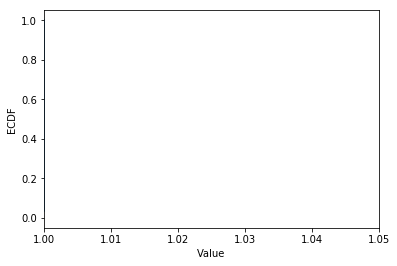

In [32]:
#we can see 344.0 is not reasonable data

df=(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False).value_counts()< 344.0)
print(df.describe())
df.hist()
plt.show()
print(df.value_counts().sort_index(ascending = False))
print(df.describe())


cdf = sm.distributions.ECDF(df)  

#cdf=ECDF(app_train['AMT_INCOME_TOTAL'])
plt.plot(cdf.x, cdf.y) 

plt.xlabel('Value') 

plt.ylabel('ECDF') 

plt.xlim([cdf.x[1], cdf.x[-1] * 1.05]) 
plt.ylim([-0.05,1.05])
plt.show()